In [20]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [21]:
# load the dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# drop irrelevant columns
df = df.drop(['PassengerId','Name','SibSp','Parch','Embarked','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [23]:
# handle missing values
# fill missing age values with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

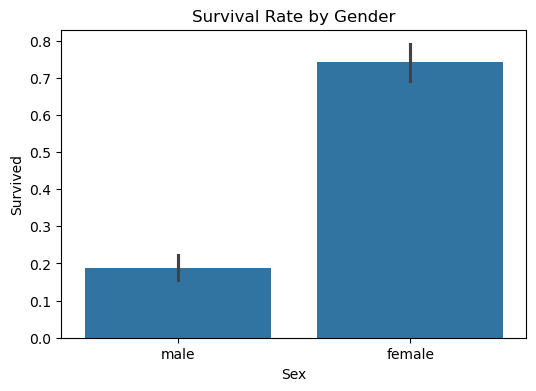

In [24]:
# Data Visualization
# Survival rate by Gender plot
plt.figure(figsize=(6,4))
sns.barplot(x='Sex',y='Survived',data=df)
plt.title("Survival Rate by Gender")
plt.show()

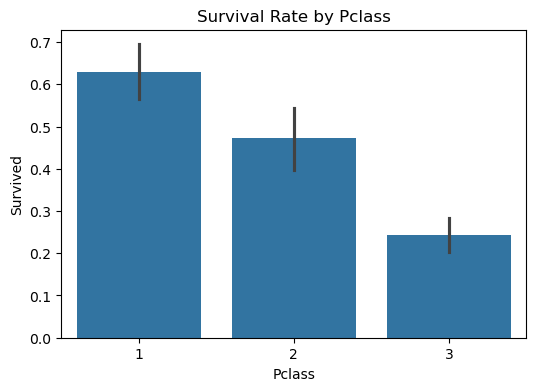

In [25]:
# Survival Rate by Pclass Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title("Survival Rate by Pclass")
plt.show()

In [30]:
# define the feature and target variables
features = df.drop('Survived',axis=1)
target = df.Survived

In [32]:
# create Label Encoder for the necessary input
le_sex = LabelEncoder()
le_pclass = LabelEncoder()

In [34]:
# fit and transform the columns
features['Sex_n'] = le_sex.fit_transform(features['Sex'])
features['Pclass_n'] = le_pclass.fit_transform(features['Pclass'])
features.head()

,Pclass,Sex,Age,Fare,Sex_n,Pclass_n
0,3,male,22.0,7.2500,1,2
1,1,female,38.0,71.2833,0,0
2,3,female,26.0,7.9250,0,2
3,1,female,35.0,53.1000,0,0
4,3,male,35.0,8.0500,1,2


In [36]:
# drop the Sex and Pclass column
features = features.drop(['Sex','Age'],axis=1)
features.head()

,Pclass,Fare,Sex_n,Pclass_n
0,3,7.2500,1,2
1,1,71.2833,0,0
2,3,7.9250,0,2
3,1,53.1000,0,0
4,3,8.0500,1,2


In [52]:
# train and split data
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [53]:
# create and fit the model
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [54]:
# Model's Accuracy
print(f"Model's Accuracy: {model.score(x_test,y_test)*100:.2f}%")

Model's Accuracy: 80.97%


In [55]:
# confusion matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
print(cm)

[[143  14]
 [ 37  74]]


Text(45.722222222222214, 0.5, 'True')

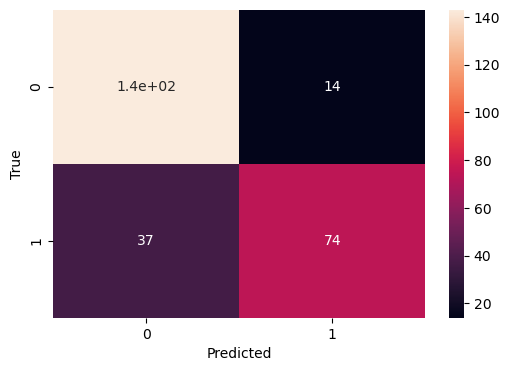

In [57]:
# confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")